# Data Preprocessing

- Load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# load the dataset
df = pd.read_csv("telecom_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- Check the structure of the dataset

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.shape

(7043, 21)

In [59]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [60]:
# Distribution of the target variable (Churn)
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


- Handle Missing Data

Check for missing values and handle them by either filling them with the median, mean, or dropping rows.

In [61]:
# Check for missing values
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [62]:
# Fill missing values for numerical columns
#df.fillna(df.mean(numeric_only=True), inplace=True)

# Drop rows with missing categorical values (if necessary)
#df.dropna(inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [64]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


Converting data from text to numeric may results into NAN, to make sure recheck missing value and if there, drop or imputes

In [65]:
df.TotalCharges.isna().sum()

np.int64(11)

Now we have 11 missing value

In [66]:
# impute missing value with mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [68]:
df.drop(columns='customerID', axis=1, inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

- Apply Label Encoding for binary categorical features
- convert yes/no to 1/0

In [16]:
# Label Encoding for binary categorical features
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['Partner'] = label_encoder.fit_transform(df['Partner'])
df['Dependents'] = label_encoder.fit_transform(df['Dependents'])
df['PhoneService'] = label_encoder.fit_transform(df['PhoneService'])
df['PaperlessBilling'] = label_encoder.fit_transform(df['PaperlessBilling'])
df['Churn'] = label_encoder.fit_transform(df['Churn'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


- Encoding Categorical Variables
Categorical variables like gender, Contract, PaymentMethod, etc., need to be encoded into numeric values.

In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


- Apply one-hot encoding for multi-class categorical features

In [20]:
# One-hot encoding for multi-class categorical features
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                                 'Contract', 'PaymentMethod'], drop_first=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   gender                                 7043 non-null   int64  
 2   SeniorCitizen                          7043 non-null   int64  
 3   Partner                                7043 non-null   int64  
 4   Dependents                             7043 non-null   int64  
 5   tenure                                 7043 non-null   int64  
 6   PhoneService                           7043 non-null   int64  
 7   PaperlessBilling                       7043 non-null   int64  
 8   MonthlyCharges                         7043 non-null   float64
 9   TotalCharges                           7043 non-null   float64
 10  Churn                                  7043 non-null   int64  
 11  Mult

In [22]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,False,False,True,False


## Step 3: Feature Engineering
Feature engineering allows us to create new features that help the model make better predictions.

### 1. Binning Continuous Variables
For instance, the tenure feature could be categorized into groups (bins) such as New customers (0-12 months), Medium-term (12-24 months), and Long-term (24+ months).


In [23]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,False,False,True,False


In [24]:
df.tenure.value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

In [25]:
# Binning tenure into categories
#df['tenure_bin'] = pd.cut(df['tenure'], bins=[0, 12, 24, np.inf], labels=['New', 'Medium', 'Long-term'])


In [26]:
#df.head()

After bining, we need to encode tenure bin as we all we need to drop original tenure column

In [27]:
#df.drop(columns='tenure', inplace=True)

In [28]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,False,False,True,False


In [29]:
# One-hot encoding for multi-class categorical features
#df = pd.get_dummies(df, columns=['tenure_bin'], drop_first=True)

In [30]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,False,False,True,False


### 2. Feature Interaction
We could create an interaction between MonthlyCharges and Contract type, assuming customers with higher monthly charges and a short contract are more likely to churn.

In [31]:
# Interaction between MonthlyCharges and Contract type
#df['Monthly_Contract_Interaction'] = df['MonthlyCharges'] * df['Contract_Two year']

In [32]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,False,False,True,False


### 3. Scaling Numerical Features
Some models like Logistic Regression and Neural Networks require features to be on a similar scale.

In [33]:
from sklearn.preprocessing import StandardScaler

# Scaling numerical features
scaler = StandardScaler()
df[['MonthlyCharges', 'TotalCharges', 'tenure']] = scaler.fit_transform(df[['MonthlyCharges', 'TotalCharges', 'tenure']])


In [34]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,-1.277445,0,1,-1.160323,-0.994971,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,0.066327,1,0,-0.259629,-0.173876,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,-1.236724,1,1,-0.362660,-0.960399,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,0.514251,0,0,-0.746535,-0.195400,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,-1.236724,1,1,0.197365,-0.941193,...,False,False,False,False,False,False,False,False,True,False


## Data Splitting
Before model training, split the data into training and testing sets to evaluate performance.

In [35]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(columns=['customerID', 'Churn']) # customerID not usefull 
y = df['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
print(X.shape)
print(y.shape)

(7043, 30)
(7043,)


In [37]:
print(X_train.shape)
print(y_train.shape)

(5634, 30)
(5634,)


In [38]:
5634/7043

0.7999432060201619

In [39]:
print(X_test.shape)
print(y_test.shape)

(1409, 30)
(1409,)


In [40]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,-1.277445,0,1,-1.160323,-0.994971,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,0.066327,1,0,-0.259629,-0.173876,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,-1.236724,1,1,-0.362660,-0.960399,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,0.514251,0,0,-0.746535,-0.195400,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,-1.236724,1,1,0.197365,-0.941193,...,False,False,False,False,False,False,False,False,True,False


## Step 4: Model Building
We’ll use Logistic Regression as our baseline model for predicting customer churn.

- Why Logistic Regression?
Logistic regression is simple, interpretable, and works well for binary classification tasks like churn prediction. It will serve as a good starting point, but we can try more advanced models later.



In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 82.11%
[[934 102]
 [150 223]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



## Step 5: Model Evaluation

**Confusion Matrix**
The confusion matrix shows how many churn and non-churn predictions were correct and incorrect.

**Classification Report**
The classification report includes important metrics:

    - Precision: How many predicted churns were correct.    
    - Recall: How many actual churns were correctly identified.
    - F1-Score: Harmonic mean of precision and recall.


**ROC-AUC Curve**
The ROC curve is used to visualize model performance, especially with imbalanced data.

ROC-AUC Score: 0.86


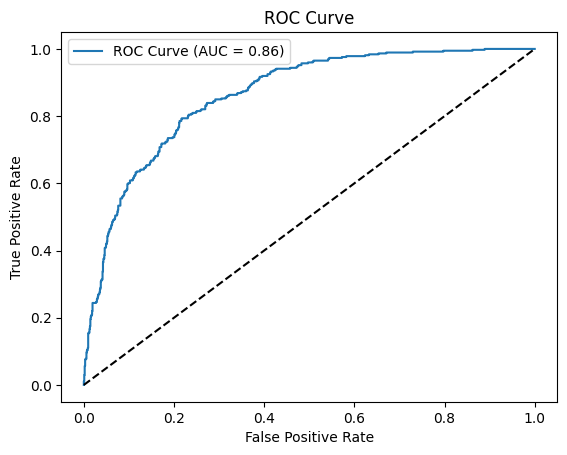

In [42]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


## Step 6: Model Tuning
We can try more advanced models like Random Forest or XGBoost to improve performance, followed by hyperparameter tuning using GridSearchCV.

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameters grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best model evaluation
best_model = grid_search.best_estimator_
y_pred_rf = best_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')


Random Forest Accuracy: 81.48%


In [47]:
y_test

185     1
2715    0
3825    0
1807    1
132     0
       ..
6366    0
315     0
2439    0
5002    0
1161    1
Name: Churn, Length: 1409, dtype: int64

In [49]:
y_pred_rf[0:10]

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [56]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
185,0,0,1,0,-1.277445,0,1,-1.328164,-0.997201,True,...,False,False,False,False,False,False,False,False,True,False
2715,1,0,0,0,0.351370,1,1,-1.313208,-0.568186,False,...,False,True,False,True,False,False,False,False,False,False
3825,0,0,1,1,0.799294,1,0,-1.509300,-0.552622,False,...,False,True,False,True,False,False,True,False,False,True
1807,0,0,0,0,-1.277445,1,0,0.385148,-0.974440,False,...,False,False,False,False,False,False,False,False,True,False
132,1,0,0,0,1.410099,1,0,-0.472339,0.431289,False,...,True,False,False,False,False,False,True,False,False,False


In [52]:
X_test.loc[185]

gender                                          0
SeniorCitizen                                   0
Partner                                         1
Dependents                                      0
tenure                                  -1.277445
PhoneService                                    0
PaperlessBilling                                1
MonthlyCharges                          -1.328164
TotalCharges                            -0.997201
MultipleLines_No phone service               True
MultipleLines_Yes                           False
InternetService_Fiber optic                 False
InternetService_No                          False
OnlineSecurity_No internet service          False
OnlineSecurity_Yes                          False
OnlineBackup_No internet service            False
OnlineBackup_Yes                            False
DeviceProtection_No internet service        False
DeviceProtection_Yes                        False
TechSupport_No internet service             False


In [55]:
best_model.predict([X_test.loc[185,:]])

d:\Documents\Data Analyst Portfolio Projects\ML_projects\churn_prediction\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

## Saving the Model
Before deploying, save the model using Pickle.

In [44]:
import pickle

# Save the best trained model to a file
pickle.dump(best_model, open('models/model.pkl', 'wb'))


In [45]:
# save other transformation model like transformation and label conding

# Scaling numerical features
pickle.dump(scaler, open('models/scaler.pkl','wb'))

In [46]:
# 


#label conding
pickle.dump(label_encoder, open('models/label_encoder.pkl','wb'))

## Step 7: Model Deployment Using Flask

Now that we have a trained model, let’s deploy it as a REST API using Flask.

**Flask App (app.py)**

Create a simple API where you can input customer data and get a churn prediction.


**Run the Flask App**

To run the Flask app, use the following command in the terminal:

**Testing the API**
Open 'http://localhost:5000/' in your browser

In [ ]:
df2 = pd.read_csv("input.csv")
df2.head()

In [ ]:
df2.info()

In [128]:
user_input_df = df2

In [129]:
for cols in ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]:
        user_input_df[cols] = pd.to_numeric(user_input_df[cols],  errors='coerce')

In [ ]:
df2.info()

In [130]:
for cols in ['gender','Partner', 'Dependents', 'PhoneService','PaperlessBilling']:
    user_input_df[cols] = label_encoder.fit_transform(user_input_df[cols])

In [131]:
label_encoded_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                                 'Contract', 'PaymentMethod']

In [132]:
user_input_df = pd.get_dummies(user_input_df, columns=label_encoded_columns, drop_first=True)

In [ ]:
user_input_df

In [ ]:
dummies_frame = pd.read_csv("x_test.csv")

    
user_input_df = user_input_df.reindex(columns = dummies_frame.columns, fill_value=0)

In [ ]:
user_input_df

In [1]:
import pandas as pd

In [ ]:
from utils.preprocess import preprocess_user_input

df2 = preprocess_user_input(pd.read_csv("input.csv"))

In [ ]:
df2

In [107]:
for cols in ['gender','Partner', 'Dependents', 'PhoneService','PaperlessBilling']:
        user_input_df[cols] = label_encoder.fit_transform(user_input_df[cols])

In [ ]:
df2

In [ ]:
y_test[y_test == 1]

In [ ]:
X_test.iloc[185]

In [ ]:
y_pred_rf = best_model.predict(X_test)
y_pred_rf

In [ ]:
y_pred_rf.sum()

In [ ]:
X_test.shape

In [ ]:
X_test.head()

In [ ]:
X_test.loc[185]

In [108]:
label_encoded_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                                 'Contract', 'PaymentMethod']
    
    # Ensure that the input is in the same format as training data
    # for col in label_encoded_columns:
    #     if col not in user_input_df:
    #         user_input_df[col] = 0  # Default or fallback value for missing columns

user_input_df = pd.get_dummies(user_input_df, columns=label_encoded_columns, drop_first=True)

In [ ]:
user_input_df

In [110]:
dummies_frame = X_test
df2 = df2.reindex(columns = dummies_frame.columns, fill_value=0)

In [ ]:
df2

In [ ]:
df2.shape

In [ ]:
df2

In [ ]:
X_test.head(1).shape

In [ ]:
X_test.head(1)

In [91]:
X_test.to_csv("x_test.csv", index=False)

In [ ]:
y_test